In [19]:
# CelesteInvestigationP2

In [20]:
# If not installed, run this cell,
%pip install wbdata
%pip install pandas
%pip install iso3166
%pip install cufflinks
%pip install eep153_tools
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# import packages

import wbdata
import pandas as pd
import math
import iso3166
import plotly.offline as py
from scipy.optimize import newton
import plotly.graph_objs as go
import numpy as np
import cufflinks as cf
from matplotlib import animation as ani
cf.go_offline()

In [22]:
pd.options.plotting.backend = 'plotly'
SOURCE2=2 

In [5]:
# Look around a bit
wbdata.get_topics()

Key '-590700454584032948' not in persistent cache.


  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

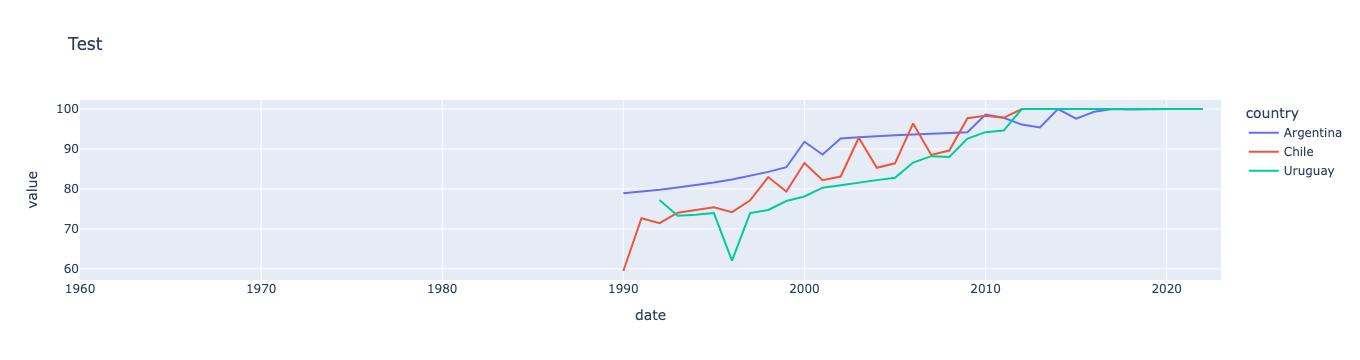

In [6]:
vars4 = {"EG.ELC.ACCS.RU.ZS":"Investigation"}

#BLA is all of Latin America and the Caribbean

scone=["BLA","CHL","ARG","URY"]
viet=["VNM","BRA"]

chldlabor = wbdata.get_dataframe(vars4,country=scone,parse_dates=True).squeeze().unstack('country')

chldlabor.plot(title="Test")

In [ ]:
wbdata.get_indicators(source=40)

In [ ]:
# World Population Pyramid

In [23]:
# Constructing a list of all possible age categories, such as 0-4, 5-9, ... 75-79, 80PLUS.
ages = []
for a in range(0,80,5):
    ages.append(f"{a:02d}"+f"{a+4:02d}")

ages.append("80UP")
# Print the result to ensure the correct ranges are created.
print(ages)

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [24]:
# Creates a dictionary, where each term defining a population in the wbdata dataset is named more descriptively.
male_ranges = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in ages}
female_ranges = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in ages}

# Develop a combined dictionary, then print it to sanity check.
categories = {**male_ranges, **female_ranges}
print(categories)

{'SP.POP.0004.MA': 'Males 0004', 'SP.POP.0509.MA': 'Males 0509', 'SP.POP.1014.MA': 'Males 1014', 'SP.POP.1519.MA': 'Males 1519', 'SP.POP.2024.MA': 'Males 2024', 'SP.POP.2529.MA': 'Males 2529', 'SP.POP.3034.MA': 'Males 3034', 'SP.POP.3539.MA': 'Males 3539', 'SP.POP.4044.MA': 'Males 4044', 'SP.POP.4549.MA': 'Males 4549', 'SP.POP.5054.MA': 'Males 5054', 'SP.POP.5559.MA': 'Males 5559', 'SP.POP.6064.MA': 'Males 6064', 'SP.POP.6569.MA': 'Males 6569', 'SP.POP.7074.MA': 'Males 7074', 'SP.POP.7579.MA': 'Males 7579', 'SP.POP.80UP.MA': 'Males 80UP', 'SP.POP.0004.FE': 'Females 0004', 'SP.POP.0509.FE': 'Females 0509', 'SP.POP.1014.FE': 'Females 1014', 'SP.POP.1519.FE': 'Females 1519', 'SP.POP.2024.FE': 'Females 2024', 'SP.POP.2529.FE': 'Females 2529', 'SP.POP.3034.FE': 'Females 3034', 'SP.POP.3539.FE': 'Females 3539', 'SP.POP.4044.FE': 'Females 4044', 'SP.POP.4549.FE': 'Females 4549', 'SP.POP.5054.FE': 'Females 5054', 'SP.POP.5559.FE': 'Females 5559', 'SP.POP.6064.FE': 'Females 6064', 'SP.POP.6569.

In [25]:
# Make a dataframe of the chosen 'country_choice' data

country_choice = "WLD"
world = wbdata.get_dataframe(categories,country="WLD")

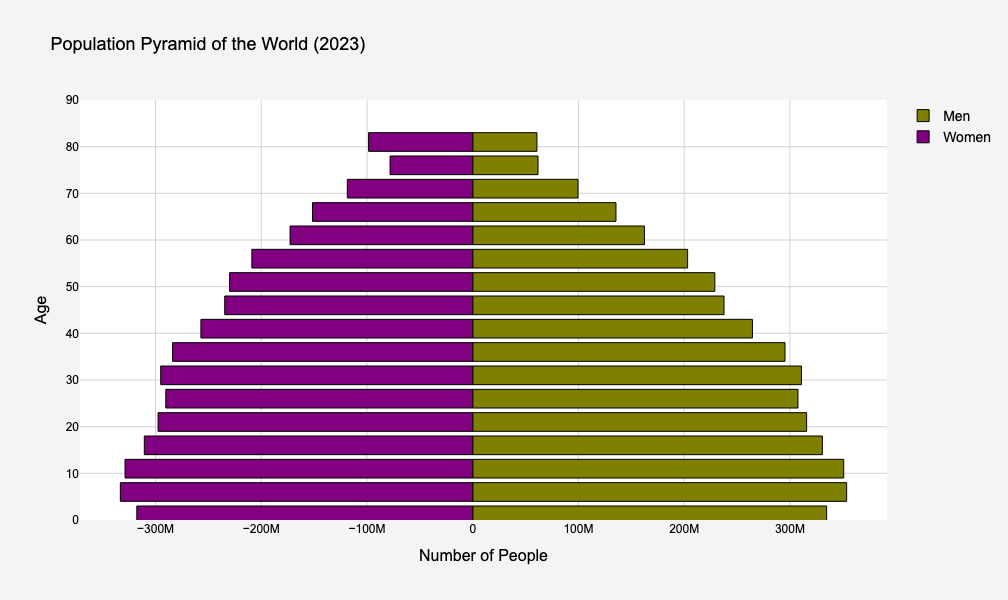

In [26]:
# Creating a population pyramid of the world
py.init_notebook_mode(connected=True)

layout = go.Layout(
    title="Population Pyramid of the World (2023)",
    title_font=dict(size=18, color='black'),
    barmode='overlay',
    width=600,
    height=600,
    paper_bgcolor='#f4f4f4',
    plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(
        title='Number of People',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    yaxis=dict(
        range=[0, 90],
        title='Age',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        gridcolor='lightgray'
    ),
    showlegend=True
)

bins = [go.Bar(x = world.loc[str(2023),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in ages],
               orientation='h',
               name='Men',
               marker=dict(color='olive', line=dict(color='black', width=1)),
               hoverinfo='skip'
               ),

        go.Bar(x = -world.loc[str(2023),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in ages],
               orientation='h',
               name='Women',
               marker=dict(color='purple', line=dict(color='black', width=1)),
               hoverinfo='skip',
               )
        ]

py.iplot(dict(data=bins, layout=layout))

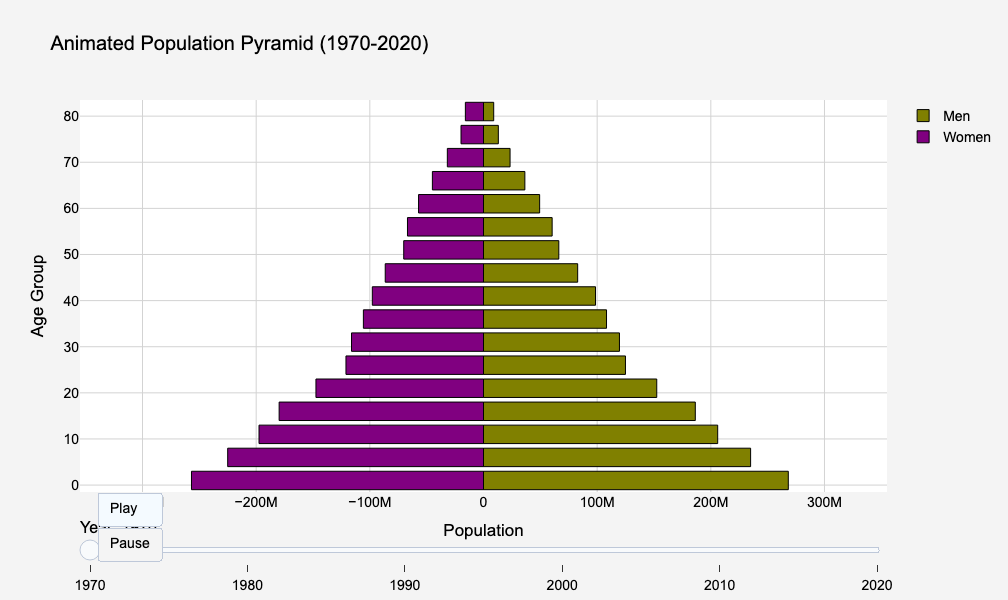

In [11]:
# Trying to make an animated one..?

# Define available years
years = [1970, 1980, 1990, 2000, 2010, 2020]
ages = [f"{i}-{i+4}" for i in range(0, 85, 5)] + ["85+"]  # Includes 85+ group

# Function to create bar traces for a given year
def get_traces(year):
    male_values = world.loc[str(year)].filter(regex="Male").values
    female_values = world.loc[str(year)].filter(regex="Female").values

    return [
        go.Bar(
            x=male_values,
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Men',
            marker=dict(color='olive', line=dict(color='black', width=1)),
            hoverinfo='skip'
        ),
        go.Bar(
            x=-female_values,  # Keep negative values for left alignment
            y=[int(s.split('-')[0]) + 1 if '-' in s else int(s[:-1]) for s in ages],
            orientation='h',
            name='Women',
            marker=dict(color='purple', line=dict(color='black', width=1)),
            hoverinfo='skip'
        )
    ]

# Ensure index is properly formatted for lookup
max_population = max(world.loc[world.index.astype(str).isin(map(str, years))].filter(regex="Male|Female").max().values)

# Create figure with initial data (1970)
fig = go.Figure(data=get_traces(1970), frames=[
    go.Frame(data=get_traces(year), name=str(year)) for year in years
])

# Update layout with proper axis alignment
fig.update_layout(
    title="Animated Population Pyramid (1970-2020)",
    width=600, height=600, paper_bgcolor='#f4f4f4', plot_bgcolor='#ffffff',
    font=dict(family="Arial, sans-serif", size=14, color="black"),
    xaxis=dict(title="Population", gridcolor='lightgray', range=[-max_population, max_population]),
    yaxis=dict(title="Age Group", gridcolor='lightgray'),
    barmode='overlay',
    showlegend=True,
    updatemenus=[{
        "buttons": [
            {"args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
             "label": "Play", "method": "animate"},
            {"args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
             "label": "Pause", "method": "animate"}
        ],
        "type": "buttons", "x": 0.1, "y": 0
    }],
    sliders=[{
        "steps": [{"args": [[str(year)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                   "label": str(year), "method": "animate"} for year in years],
        "currentvalue": {"prefix": "Year: ", "font": {"size": 16}}
    }]
)

fig.show()